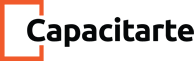

### **Colab Python para Módulo 5**

En este modulo vamos a realizar nuestro primer modelo no supervisado para un análisis predictivo de clustering.

Utilizaremos el dataset de Wholesale Foods, uno de los set de datos mas utilizados para los desafios de Data Science de segmentación analítica.

En nuestro caso, utilizaremos lo aprendido para intentar segmentar mediante clusteres automáticos nuestros clientes segun los items que compran en un supermercado.

In [ ]:
## Librerias que vamos a utilizar
import pandas as pd # Link:  https://pandas.pydata.org/
import numpy as np # Link : https://numpy.org/
import sklearn as skl # Link : https://scikit-learn.org/stable/
import seaborn as sns # Link : https://seaborn.pydata.org/
import matplotlib.pyplot as plt # Link: https://matplotlib.org/

# 1. Entendemos el negocio

Fuente: https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set

El conjunto de datos "Wholesale customers" contiene información sobre los gastos de los clientes de un distribuidor mayorista en diferentes categorías de productos. El conjunto de datos consta de 440 muestras y 8 características:

* FRESH: gastos anuales en productos frescos (frutas, verduras, etc.).
* MILK: gastos anuales en productos lácteos.
* GROCERY: gastos anuales en productos comestibles.
* FROZEN: gastos anuales en productos congelados.
* DETERGENTS_PAPER: gastos anuales en productos de limpieza y papel.
* DELICATESSEN: gastos anuales en productos de charcutería y delicatessen.
* CHANNEL: indica el canal de venta (Hoteles, restaurantes y cafeterías, o Retail para minoristas).
* REGION: indica la región geográfica del cliente (Lisboa, Oporto u otras).

** No tiene target ya que es un dataset ideal para clustering **

El objetivo es agrupar a los clientes del supermercado mayorista en diferentes grupos en función de sus hábitos de compra, lo que podría ayudar a la empresa a optimizar sus estrategias de marketing y distribución.


# 2. Entendemos los datos

In [ ]:
df = pd.read_csv('/content/wholesale_customers.csv')
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [ ]:
df.Channel.unique()

array([2, 1])

In [ ]:
df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

<Axes: >

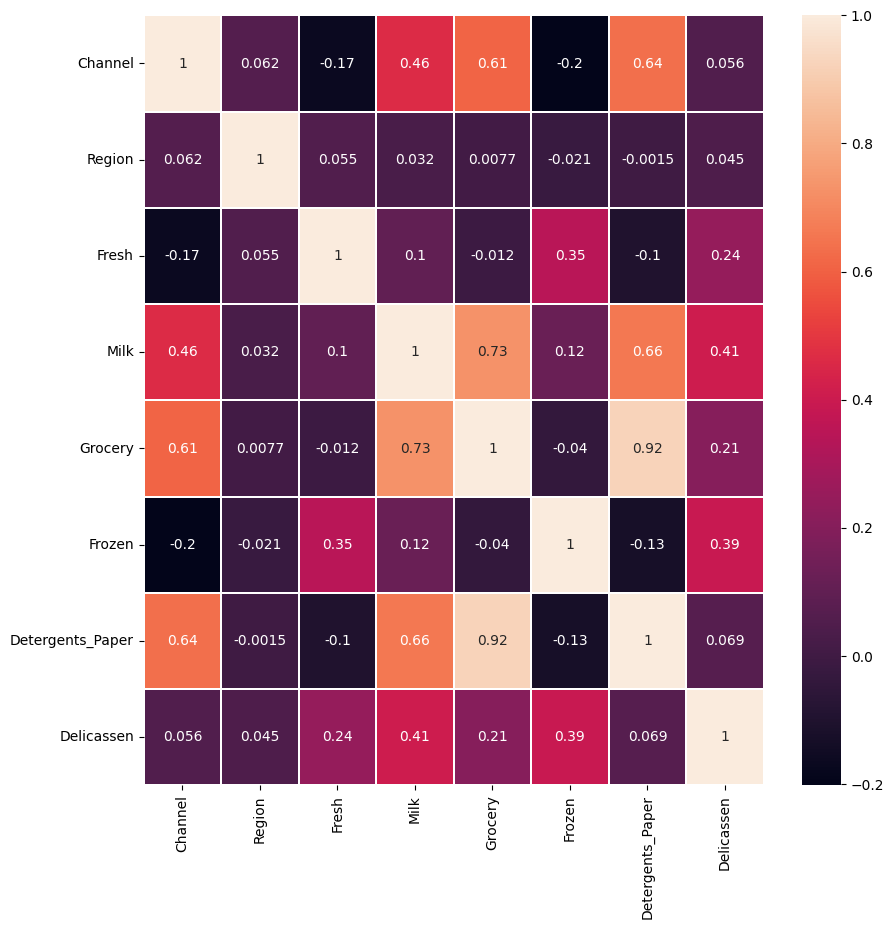

In [ ]:
# Matriz de correlacion de variables
df_correlacion = df.corr()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data = df_correlacion, annot = True, linewidths = 0.3, ax = ax)

array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

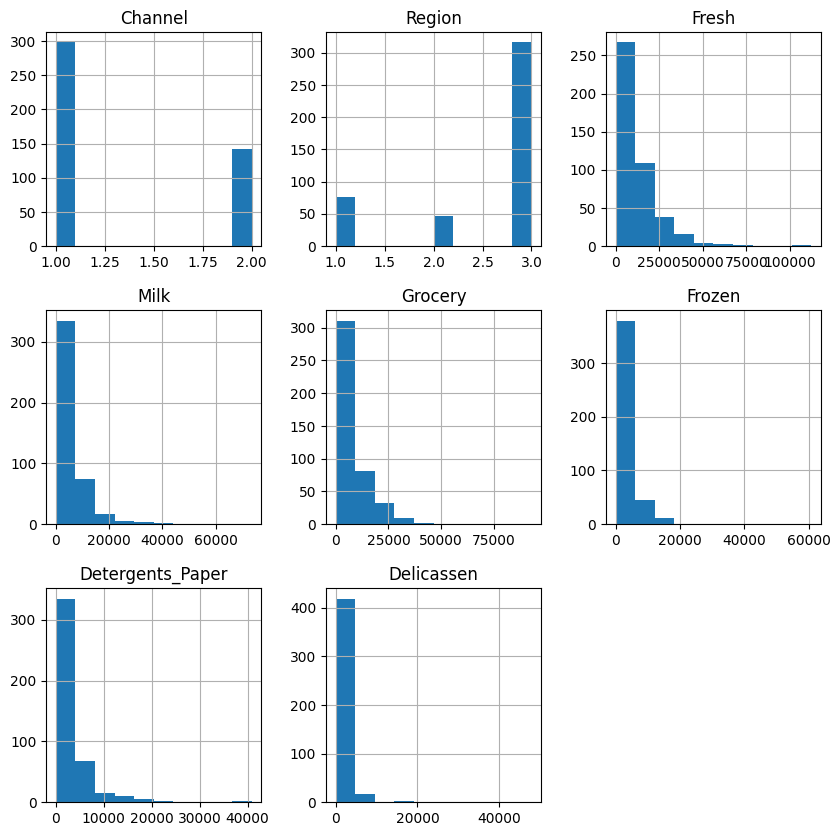

In [ ]:
# Realizamos un análisis de distribución de variables
df.hist(bins = 10, figsize = (10,10))

# 3. Preprocesamiento de los datos

### 3.1 Limpieza de nulls y errores

In [ ]:
df.shape

(440, 8)

In [ ]:
# Evaluo Nulos
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### 3.2 Variables Categóricas

In [ ]:
# Evaluar cuantas variables categóricas hay.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

# 4. Entrenamiento

### 4.1 Variables predictoras

In [ ]:
# To Do: Definir X como todo el df, sin hacer split

In [ ]:
X = df

### 4.2 Eleccion del algoritmo

Para los problemas de clustering hay multiples algoritmos. Sklearn ofrece un overview sobre todos los que tiene disponibles.

En este módulo usaremos KMeans, el más famoso y conocido en Ciencia de datos

https://scikit-learn.org/stable/modules/clustering.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans


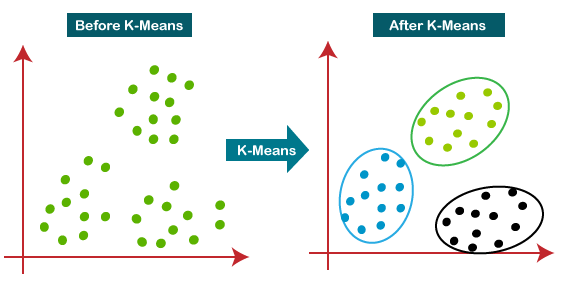

In [ ]:
# To Do: Crear un algoritmo de KMeans con 5 K

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clus = KMeans(n_clusters = 5)

In [ ]:
# To Do: Entrenar nuestro algoritmo con el set de datos X

In [ ]:
clus.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
X.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [ ]:
X['cluster_elegido'] = clus.predict(X)

In [ ]:
X.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  cluster_elegido  
0        1338                0  
1        1776                0  
2        7844                0  
3        1788                1  
4        5185                1

In [ ]:
X['cluster_elegido'].value_counts()

0    219
1    110
3     78
4     26
2      7
Name: cluster_elegido, dtype: int64

### 4.3 Interpretación y evaluación de resultados

In [ ]:
# To Do: Realizar medida de la silueta

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X.drop('cluster_elegido', axis = 1), X.cluster_elegido)

0.3634715540384712

In [ ]:
# Interpretamos la salida:
media_k5 = X.groupby(['cluster_elegido']).mean()
media_k5

Channel    Region         Fresh          Milk       Grocery  \
cluster_elegido                                                                 
0                1.187215  2.529680   5756.219178   3421.086758   4231.616438   
1                1.190909  2.536364  20429.072727   3575.881818   4988.881818   
2                2.000000  2.571429  20031.285714  38084.000000  56126.142857   
3                1.910256  2.525641   5076.653846  12288.525641  18814.525641   
4                1.076923  2.730769  47543.192308   7026.884615   6255.576923   

                      Frozen  Detergents_Paper   Delicassen  
cluster_elegido                                              
0                2431.762557       1310.187215  1001.721461  
1                3920.209091       1082.272727  1640.409091  
2                2564.571429      27644.571429  2548.142857  
3                1605.000000       8254.397436  1830.512821  
4                9412.653846        943.115385  4250.153846

In [ ]:
# Que pasaba si dejabamos la busqueda 3 clusters?
## Script para generar nuevos datos y modelo
df_prueba_k3 = pd.read_csv('/content/wholesale_customers.csv')
k_3 = KMeans(n_clusters = 3)
k_3_fitted = k_3.fit(df_prueba_k3)
df_prueba_k3['cluster_elegido_k3'] = k_3_fitted.predict(df_prueba_k3)
print("Silueta: " + str (silhouette_score(df_prueba_k3.drop('cluster_elegido_k3', axis =1), df_prueba_k3.cluster_elegido_k3)))
media_k3 = df_prueba_k3.groupby(['cluster_elegido_k3']).mean()
media_k3

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silueta: 0.47977587145684614


Channel    Region         Fresh          Milk  \
cluster_elegido_k3                                                   
0                   1.259819  2.549849   8298.797583   3817.193353   
1                   1.960000  2.440000   8000.040000  18511.420000   
2                   1.135593  2.593220  36156.389831   6123.644068   

                         Grocery       Frozen  Detergents_Paper   Delicassen  
cluster_elegido_k3                                                            
0                    5269.567976  2567.854985       1768.996979  1136.039275  
1                   27573.900000  1996.680000      12407.360000  2252.020000  
2                    6366.779661  6811.118644       1050.016949  3090.050847